In [76]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [77]:
data = pd.read_csv("/home/jishnu/Desktop/ Data_Sets/unclean_smartwatch_health_data.csv")

In [78]:
df = data.copy()

In [79]:
df.shape

(10000, 7)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9850 non-null   object 
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [81]:
df.head()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6


In [82]:
df.isnull().sum()

User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64

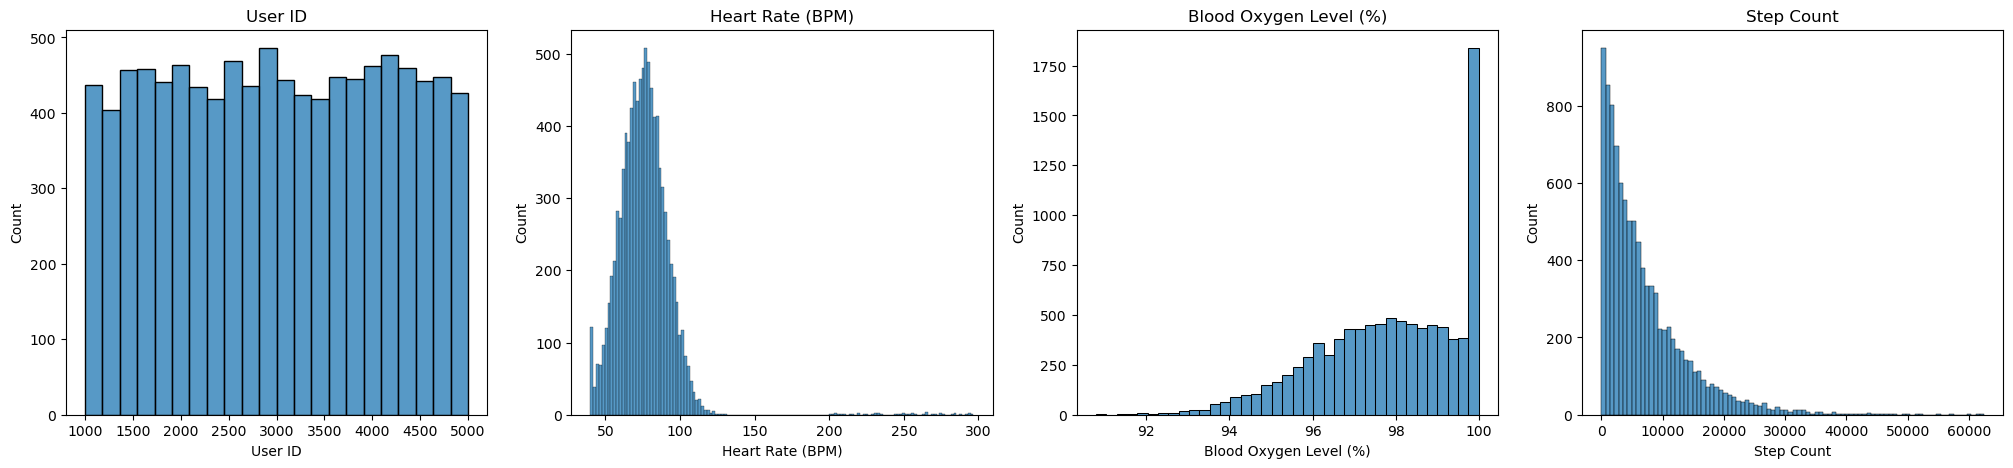

In [83]:
c1 = df.select_dtypes("float")

fig,axs = plt.subplots(1,4,figsize = (25,5))

for i in range(4):
    sns.histplot(data = df, x=c1.columns[i],ax = axs[i])
    axs[i].set_title(c1.columns[i])
plt.show()

### Null Value Handling

In [84]:
df["User ID"] =  df["User ID"].fillna(df["User ID"].mean())
c2 = ["Heart Rate (BPM)","Blood Oxygen Level (%)","Step Count"]
for i in c2:
    df[i] = df[i].fillna(df[i].median())
c3 = df.select_dtypes("object")

for i in c3:
    df[i] = df[i].fillna(df[i].mode()[0])
df.isnull().sum()

User ID                   0
Heart Rate (BPM)          0
Blood Oxygen Level (%)    0
Step Count                0
Sleep Duration (hours)    0
Activity Level            0
Stress Level              0
dtype: int64

### Outlier Removal

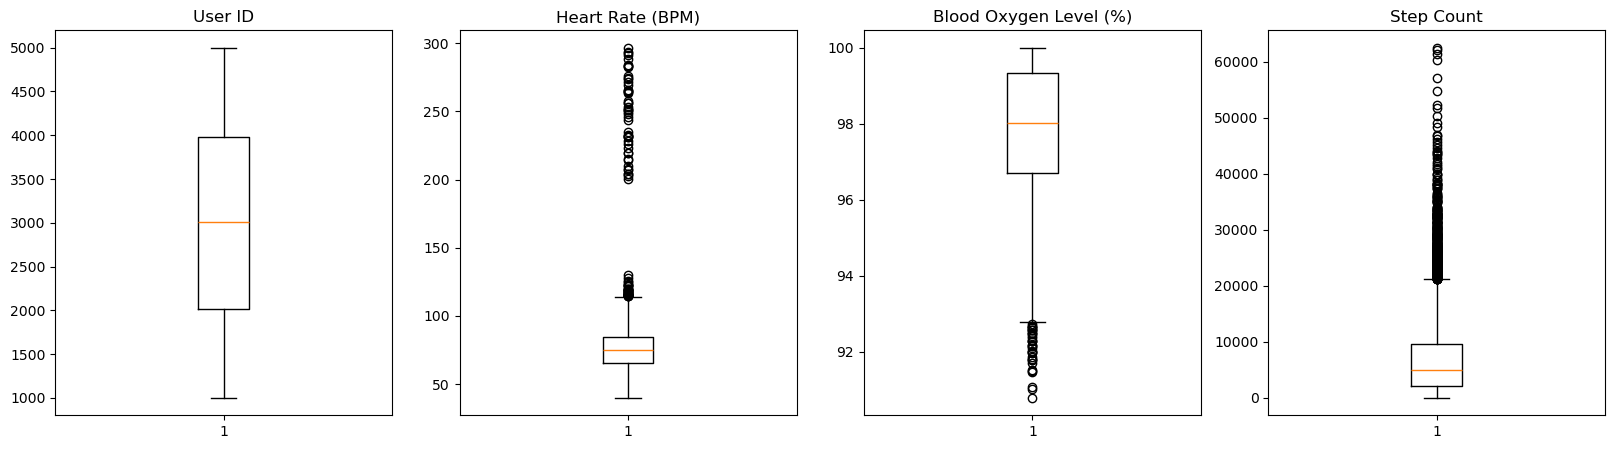

In [85]:
c4 = df.select_dtypes("float")

fig,axs = plt.subplots(1,4,figsize = (20,5))

for i in range(4):
    axs[i].boxplot(df[c4.columns[i]])
    axs[i].set_title(c4.columns[i])
plt.show()

In [86]:
def outliers(df,col):
    Q1 = np.percentile(df[col],25,method="midpoint")
    Q3 = np.percentile(df[col],75,method="midpoint")

    IQR = Q3 - Q1

    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    outlier = df[(df[col]>upper)|(df[col]<lower)]
    outlier_list = outlier[col].tolist()

    return upper,lower,outlier,outlier_list

In [87]:
upper,lower,outlier,list1 = outliers(df,"Heart Rate (BPM)")
print(f"upper={upper}, lower={lower}, outlier_list = {list1}")
outlier.head()

upper=114.00123466222153, lower=36.109693287307735, outlier_list = [247.8030522923432, 118.29493321826284, 115.07828810239958, 200.49164217071984, 219.1991782129313, 232.9449069272243, 264.46735633766275, 226.2567250935164, 115.37629943806472, 265.5429095106564, 114.38787592976996, 117.71060779267508, 207.1021876945045, 130.3120020224745, 207.43024338048195, 117.15926886369355, 215.19468105471688, 204.0678112444548, 209.77392353062743, 228.4980779780263, 256.377377355097, 283.58578538080286, 121.7452204952703, 115.40365803639864, 115.41131303006912, 116.86122514348094, 292.9232995560192, 282.8631240383314, 127.58807105317372, 243.8769779618632, 284.05525490682896, 118.36817774758477, 271.4957856042119, 231.25544172033543, 125.73364314352746, 115.0058584624568, 276.12398317377074, 296.5939695131042, 123.25475380185284, 204.0576099318878, 249.617291391865, 269.1459746695917, 115.37692010721736, 250.62067876216804, 246.0941444842628, 115.73846179568152, 118.5325595220546, 264.642811516389

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
47,2806.0,118.294933,95.629327,253.743297,5.83928648563342,Active,8
62,3068.0,115.078288,99.928041,1918.372142,ERROR,Highly_Active,4
337,2369.0,200.491642,95.441773,2998.761919,6.670622263019579,Highly Active,9
393,2443.0,219.199178,95.497181,1227.804688,5.185244686595328,Highly_Active,9


In [88]:
df = df[(df["Heart Rate (BPM)"]>=lower)&(df["Heart Rate (BPM)"]<=upper)] #outlier removal

In [89]:
outlier = df[(df["Heart Rate (BPM)"] > upper) | (df["Heart Rate (BPM)"]<lower)]["Heart Rate (BPM)"].tolist()
outlier

[]

In [90]:
upper,lower,outlier,list2 = outliers(df,"Blood Oxygen Level (%)")
print(f"upper={upper}, lower={lower}, outlier_list = {list1}")
outlier.head()

upper=103.2692933233158, lower=92.77625391106048, outlier_list = [247.8030522923432, 118.29493321826284, 115.07828810239958, 200.49164217071984, 219.1991782129313, 232.9449069272243, 264.46735633766275, 226.2567250935164, 115.37629943806472, 265.5429095106564, 114.38787592976996, 117.71060779267508, 207.1021876945045, 130.3120020224745, 207.43024338048195, 117.15926886369355, 215.19468105471688, 204.0678112444548, 209.77392353062743, 228.4980779780263, 256.377377355097, 283.58578538080286, 121.7452204952703, 115.40365803639864, 115.41131303006912, 116.86122514348094, 292.9232995560192, 282.8631240383314, 127.58807105317372, 243.8769779618632, 284.05525490682896, 118.36817774758477, 271.4957856042119, 231.25544172033543, 125.73364314352746, 115.0058584624568, 276.12398317377074, 296.5939695131042, 123.25475380185284, 204.0576099318878, 249.617291391865, 269.1459746695917, 115.37692010721736, 250.62067876216804, 246.0941444842628, 115.73846179568152, 118.5325595220546, 264.64281151638994

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
39,1474.0,67.404282,92.655673,2830.668684,4.827592494476892,Sedentary,7
389,4991.0,89.812696,92.003999,3197.915998,6.867673807383509,Seddentary,7
548,1833.0,78.880652,92.109389,2274.291267,6.833725883961385,Sedentary,4
736,4267.0,61.425090,92.614586,6512.104640,5.855440508900086,Highly Active,4
773,3914.0,74.337231,92.288167,2482.815316,7.45563119856827,Actve,5


In [91]:
df = df[(df["Blood Oxygen Level (%)"] >=lower)&(df["Blood Oxygen Level (%)"]<=upper)]

In [92]:
outlier = df[(df["Blood Oxygen Level (%)"]>upper)|(df["Blood Oxygen Level (%)"]<lower)]["Blood Oxygen Level (%)"].tolist()
outlier

[]

In [93]:
upper,lower,outlier,list3 = outliers(df,"Step Count")
print(f"list3 ={list3}")
outlier.head()

list3 =[29066.332093973066, 24206.2616051376, 33956.71708694028, 29130.793780394342, 24477.521605096616, 30988.40542353572, 21369.886287510155, 26745.048356271254, 24409.67651168888, 23888.20728812537, 32242.78545614413, 23943.924491834987, 25673.12472950523, 27177.329420196234, 21546.11490437152, 22325.612431020894, 22529.400436881224, 22750.95241850622, 25519.192758772504, 24129.722791201857, 60278.37967237594, 44035.248448782535, 28540.799357029, 21314.24876691331, 29198.854895841992, 28877.24293449691, 23514.46020648361, 26410.34954891661, 35557.80706958374, 52359.72651022288, 33262.48762045069, 34893.02779786634, 24344.889877138787, 37322.09827702225, 30355.43853030847, 28790.15292881338, 34758.70824993356, 23719.896706989926, 32303.78182954544, 42012.95834085415, 24183.49807659501, 25080.76623048849, 57034.62639510958, 22223.785297753497, 25587.16552051104, 26255.075157804746, 28925.900682023497, 36119.054083999, 28224.64736929208, 29377.1079382812, 23224.39836266218, 25869.48369

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
40,2082.0,64.420247,98.424350,29066.332094,4.825839792965481,Highly_Active,3
64,3214.0,84.677230,98.463402,24206.261605,7.146885698832684,Seddentary,1
69,3061.0,79.382035,98.785674,33956.717087,4.516866155064028,Active,7
88,2585.0,47.428604,100.000000,29130.793780,4.777099520399842,Highly Active,2
146,2522.0,110.374364,99.230932,24477.521605,7.883614775842309,Seddentary,9


In [94]:
df = df[(df["Step Count"]>=lower)&(df["Step Count"]<=upper)]

In [95]:
outlier = df[(df["Step Count"]>upper)|(df["Step Count"]<lower)]["Step Count"].tolist()
outlier

[]

In [96]:
df.reset_index(drop = True, inplace = True)

In [97]:
df.head()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.000000,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,3007.480253,75.220601,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,2294.000000,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
3,2130.000000,61.950165,98.583797,15679.067648,ERROR,Highly_Active,6
4,2095.000000,96.285938,94.202910,10205.992256,8.378342673824589,Highly_Active,10


In [98]:
df["Sleep Duration (hours)"].unique()

array(['7.167235622316564', '6.538239375570314', '7.367789630207228', ...,
       '6.91654920303435', '5.691233932149209', '5.691001039740254'],
      dtype=object)

In [99]:
df["Stress Level"].unique()

array(['1', '5', '3', '6', '10', '2', '8', '9', '4', 'Very High', '7'],
      dtype=object)

In [100]:
df["Sleep Duration (hours)"] = pd.to_numeric(df["Sleep Duration (hours)"], errors="coerce")


In [101]:
df["Stress Level"] = df["Stress Level"].replace("Very High", 10)
df["Stress Level"] = pd.to_numeric(df["Stress Level"], errors="coerce")

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9431 entries, 0 to 9430
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9431 non-null   float64
 1   Heart Rate (BPM)        9431 non-null   float64
 2   Blood Oxygen Level (%)  9431 non-null   float64
 3   Step Count              9431 non-null   float64
 4   Sleep Duration (hours)  9057 non-null   float64
 5   Activity Level          9431 non-null   object 
 6   Stress Level            9431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 515.9+ KB


In [103]:
df1 = df.copy()

### onehot Encoding

In [104]:
df["Activity Level"].nunique()

6

In [105]:
df1 = pd.get_dummies(df1,columns = ["Activity Level"],dtype = int,drop_first = True)

In [106]:
df1

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Stress Level,Activity Level_Actve,Activity Level_Highly Active,Activity Level_Highly_Active,Activity Level_Seddentary,Activity Level_Sedentary
0,4174.000000,58.939776,98.809650,5450.390578,7.167236,1,0,1,0,0,0
1,3007.480253,75.220601,98.532195,727.601610,6.538239,5,0,0,1,0,0
2,2294.000000,40.000000,96.894213,13797.338044,7.367790,3,1,0,0,0,0
3,2130.000000,61.950165,98.583797,15679.067648,NaN,6,0,0,1,0,0
4,2095.000000,96.285938,94.202910,10205.992256,8.378343,10,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9426,1524.000000,78.819386,98.931927,2948.491953,7.402749,7,0,0,0,0,0
9427,4879.000000,48.632659,95.773035,4725.623070,6.382166,2,0,0,0,0,1
9428,2624.000000,73.834442,97.945874,2571.492060,6.916549,4,0,0,0,0,1
9429,4907.000000,75.220601,98.401058,3364.788855,5.691234,8,0,0,0,0,0


### labelencoding

In [107]:
df2 = df.copy()

In [108]:
le = LabelEncoder()

df2["Activity Level"] = le.fit_transform(df2["Activity Level"])

In [110]:
df2

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.000000,58.939776,98.809650,5450.390578,7.167236,2,1
1,3007.480253,75.220601,98.532195,727.601610,6.538239,3,5
2,2294.000000,40.000000,96.894213,13797.338044,7.367790,1,3
3,2130.000000,61.950165,98.583797,15679.067648,NaN,3,6
4,2095.000000,96.285938,94.202910,10205.992256,8.378343,3,10
...,...,...,...,...,...,...,...
9426,1524.000000,78.819386,98.931927,2948.491953,7.402749,0,7
9427,4879.000000,48.632659,95.773035,4725.623070,6.382166,5,2
9428,2624.000000,73.834442,97.945874,2571.492060,6.916549,5,4
9429,4907.000000,75.220601,98.401058,3364.788855,5.691234,0,8
